<a href="https://colab.research.google.com/github/20KMJ/ESAA7/blob/main/0522_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%BC%80%EB%9D%BC%EC%8A%A41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 03. 케라스(Keras)

# 01 | 딥러닝 준비

## 1-1 주요 용어

### 1-1-1 하이퍼파라미터(hyper-parameter)

- 딥러닝의 하이퍼파라미터는 파이썬의 파라미터와는 다른 의미를 가짐
- 하이퍼파라미터: 사용자가 직접 설정해야 하는 값
- 하이퍼파라미터 튜닝(tuning): 하이퍼파라미의 값을 조절하는 것
> [Tip]  
> 딥러닝 프로젝트를 실행하는 초기 단계에 많은 시간을 튜닝하는 데에 투자하는 것보다 가장 마지막 단계에 진행하는 것을 추천함



### 1-1-2 과소적합 vs. 과대적합(underfitting vs. overfitting)

- 과소적합: 모델이 충분히 학습되지 않아 예측 성능이 떨어진 상태
- 과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
- 모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야함

### 1-1-3 에포크(epoch)

- 딥러닝: 데이터셋을 학습하는 과정을 여러 번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정
- 1 epoch: 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)
> [Tip]  
> epoch는 중요한 하이퍼파라미터로, 사전에 설정한 최대 epoch까지 반복 학습이 끝나더라도 모델이 과소적합되었다고 판단된다면 epoch를 늘려서 다시 학습할 필요가 있다. 반대로 모델이 빠르게 과대적합 구간으로 진입한다면 epoch를 줄여서 최적 구간에서 학습을 조기에 종료하는 것이 과대적합을 방지하고 시간을 절약할 수 있다.

### 1-1-4 손실함수(loss function)

- 예측 값과 정답 값의 차이 또는 오차(Error)
- *오차: 딥러닝 모델의 출력 값과 실제 값과의 차이*
- 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 하며 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적이다.

지도학습(supervised learning)의 분류 문제:
1. 이진 분류(binary classification)
- `binary_crossentropy` 손실함수 사용
- 출력층의 활성화 함수(activation function)로 'sigmoid' 사용
2. 다중 분류(multi-class classification)
- 원핫 벡터인 경우: `categorical_crossentropy` 손실함수 사용
- 레이블 값(예시:0,1,2,3,...)인 경우: `sparse_categorical_crossentropy` 손실함수 사용
- 출력층의 활성화 함수로 'softmax' 사용

회귀 모델:  
MSE, MAE, 후버(Huber) 등 사용

> 손실함수 목록:  
> 1) 분류  
> 함수: `binary_crossentropy`, `categorical_crossentropy`, `sparse_categorical_crossentropy`  
> 클래스: BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy  
>
> 2) 회귀  
> 함수: `mean_squared_error`, `mean_absolute_error`, `mean_absolute_percentage_error`, `mean_squared_logarithmic_error`, `huber`  
> 클래스: MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredLogarithmicError, Huber

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

> [Tip]  
> 딥러닝 문제에 따라서는 텐서플로에서 제공하는 손실함수로 해결하기 어려운 경우가 있다. 이럴 때는 사용자가 직접 손실함수를 만들어서 사용해야 한다. 기본 제공 손실함수와 같이 함수 형태나 클래스 형태 모두 가능하다.

### 1-1-5 경사하강법(gradient descent)

- 딥러닝 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

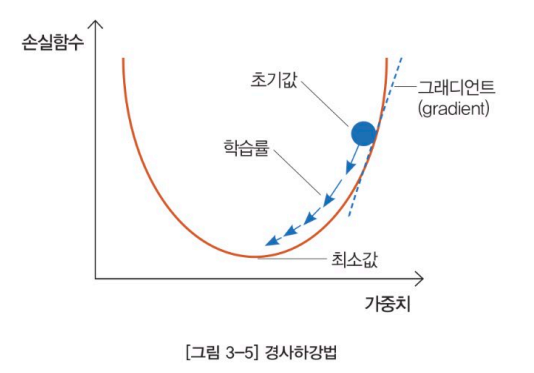

> 경사하강법을 넘파이(NumPy)로 직접 구현해보자.
- 단순 선형회귀 수식(y=wx+b)이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현

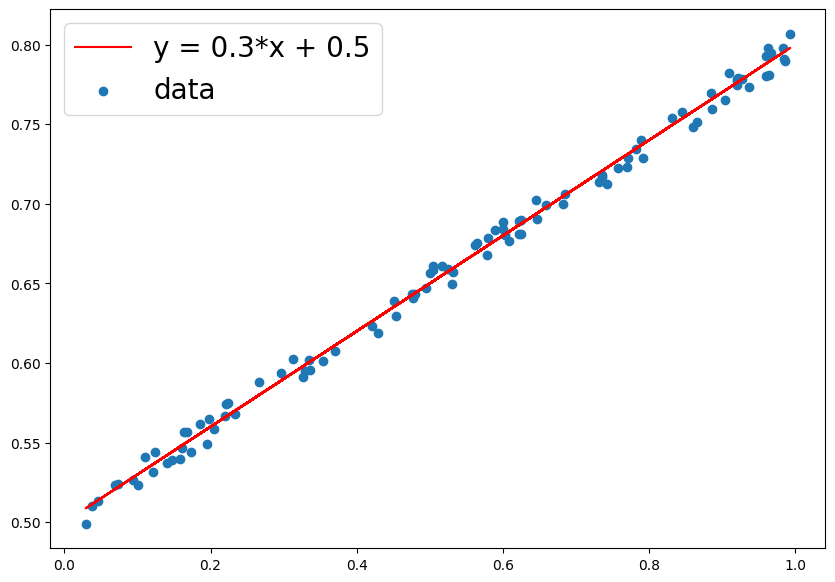

w:0.3,b:0.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [6]:
## 최적화 과정 구현

# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.16406, b = 0.74707 error = 12.02830
 5 w = 0.12323, b = 0.60225 error = 0.14703
10 w = 0.14995, b = 0.58604 error = 0.10562
15 w = 0.17286, b = 0.57284 error = 0.07614
20 w = 0.19226, b = 0.56167 error = 0.05502
25 w = 0.20868, b = 0.55221 error = 0.03989
30 w = 0.22258, b = 0.54421 error = 0.02904
35 w = 0.23434, b = 0.53743 error = 0.02127
40 w = 0.24430, b = 0.53169 error = 0.01570
45 w = 0.25273, b = 0.52684 error = 0.01171
50 w = 0.25987, b = 0.52273 error = 0.00886
55 w = 0.26591, b = 0.51925 error = 0.00681
60 w = 0.27103, b = 0.51630 error = 0.00534
------------------------------------------------------------
62 w = 0.3, b = 0.5 error = 0.00488


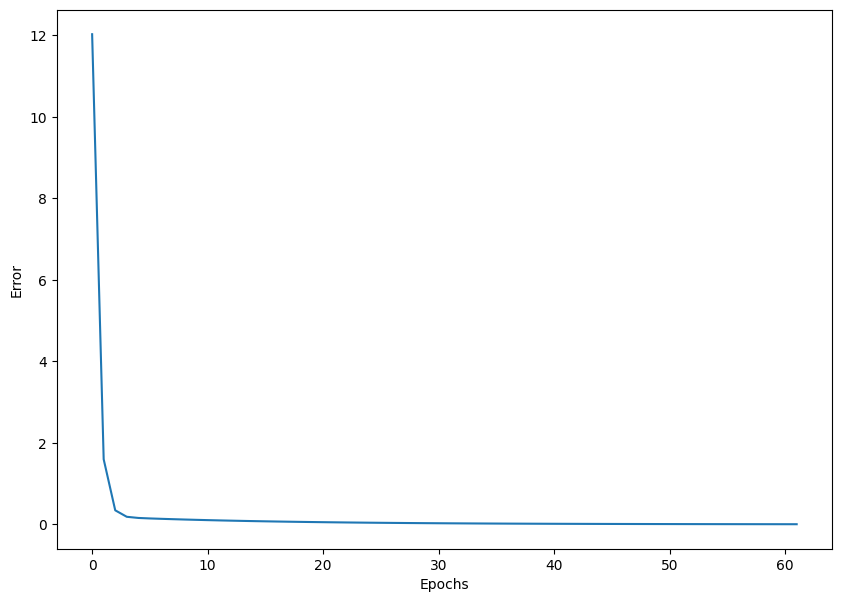

In [7]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 1-2 딥러닝 프로세스

데이터 로드 > 데이터 전처리 > 데이터 분할 > 모델 생성&컴파일 > 훈련 > **검증** > 예측  
**검증 --> (하이퍼파라미터 튜닝) --> 모델 생성&컴파일*

### 1-2-1 데이터 전처리

데이터를 모델에 주입하기 전에 데이터를 가공하는 단계  
*(예: 배열의 차원 변경, 스케일 조정 등)*

### 1-2-2 모델 생성

모델의 구조를 정의하고 생성하는 단계
1. 순차적인 구조의 모델
- Sequential API로 구현
2. 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델
- Functional API 혹은 Model Subclassing 방법으로 구현

### 1-2-3 모델 컴파일

- 생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의
- 모델 인스턴스에 compile() 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 설정하는 단계

### 1-2-4 모델 훈련

모델을 훈련하는 단계
- fit() 함수에 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달
- *훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등을 지정*

### 1-2-5 모델 검증

- 훈련이 완료된 모델을 검증하는 단계
- 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 반복

### 1-2-6 모델 예측

훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환

# 02 | 단순 신경망 훈련

### 2-1 선형회귀

단순선형회귀: y = wx + b

### 2-2 뉴런(Neuron)

- 인공 신경망 모델을 구성하는 하나의 신경
- 노드(node)

- 신경망은 여러 개의 레이어(layer)를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨
- 뉴런의 내부에는 가중치가 존재함. 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨

### 2-3 Dense 레이어

- 심층 신경망 모델을 구성하는 가장 기본 레이어

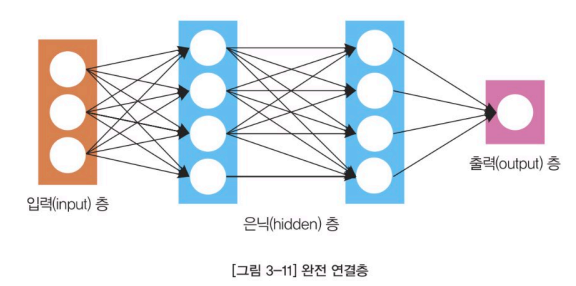

[그림 3-11]
- 4개의 Dense 레이어로 구성된 모델
- 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개
- 입력 레이어: 3개의 뉴런, 출력 레이어: 1개의 뉴런
- 모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있어 **완전연결층**이라고 정의함

In [8]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

## 2-4 데이터셋 만들기

In [9]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


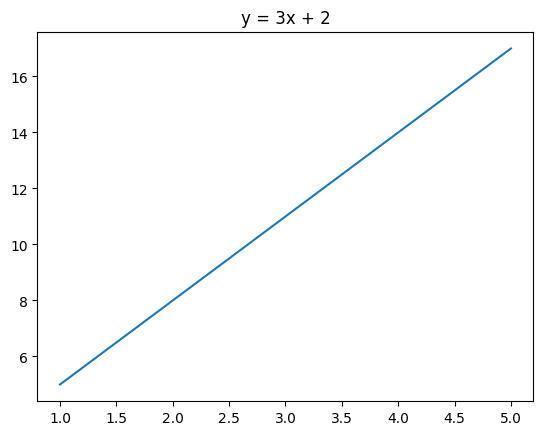

In [10]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

## 2-5 Sequential API

### 2-5-1 모델 구조

In [11]:
## 모델 생성 (Dense 레이어 3개를 갖는 모델)
# 방법1: 리스트형
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

In [12]:
# 방법2: add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### 2-5-2 입력 데이터 형태

- Sequential API를 사용하여 모델을 구성할 때 반드시 첫 번째 층은 `input_shape` 매개변수를 지정해야함

In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
  # 입력 데이터의 shape=(150,4)인 경우
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])

### 2-5-3 단순선형회귀 모델 정의

In [14]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

> Dense 레이어 디폴트는 use_biase=True -> 상수항 b 포함

## 2-6 모델 요약

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 2-7 컴파일

- 모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 평가지표(metrics) 등을 정의

In [16]:
# 방법1: 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [17]:
# 방법2: 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [19]:
# 방법3: 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [20]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## 2-8 훈련

In [21]:
# epoch=5: 5번 반복 훈련한 뒤 결과 확인
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 676ms/step - loss: 301.0217 - mae: 16.0383
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 175.4524 - mae: 12.2691
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 102.2767 - mae: 9.3917
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 59.6333 - mae: 7.1950
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 34.7826 - mae: 5.5181


In [22]:
## 코드 종합

# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 446ms/step - loss: 77.7200 - mae: 8.3005
Epoch 2/1200
1/1 [==============================] - 0s 20ms/step - loss: 45.4210 - mae: 6.3884
Epoch 3/1200
1/1 [==============================] - 0s 13ms/step - loss: 26.5979 - mae: 4.9285
Epoch 4/1200
1/1 [==============================] - 0s 14ms/step - loss: 15.6278 - mae: 3.8139
Epoch 5/1200
1/1 [==============================] - 0s 15ms/step - loss: 9.2342 - mae: 2.9629
Epoch 6/1200
1/1 [==============================] - 0s 15ms/step - loss: 5.5074 - mae: 2.3131
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 3.3348 - mae: 1.8168
Epoch 8/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.0678 - mae: 1.4378
Epoch 9/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.3287 - mae: 1.1483
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.8971 - mae: 0.9272
Epoch 11/1200
1/1 [==============================] - 0

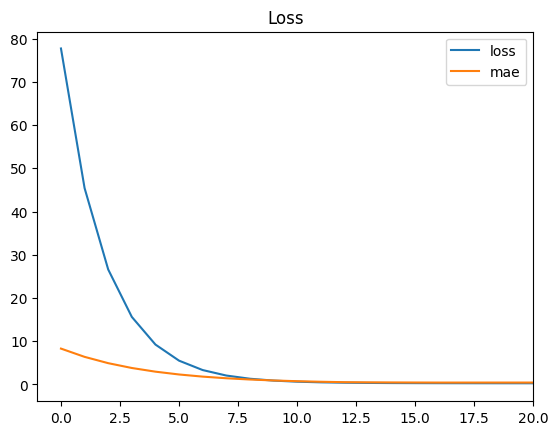

In [23]:
## epoch별 훈련 손실 및 평가지표 시각화
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

## 2-9 검증

In [24]:
model.evaluate(x,y)

1/1 [==============================] - 0s 111ms/step - loss: 9.3207e-05 - mae: 0.0083


[9.320732351625338e-05, 0.008286571130156517]

> 사전에 별도의 검증 데이터셋을 준비하여 모델의 성능을 평가하는 것이 일반적인 방법. 즉, **교차 검증**(cross-validation). (예: 홀드 아웃, K-Fold 교차 검증 등)

## 2-10 예측

In [25]:
model.predict([10])

1/1 [==============================] - 0s 136ms/step


array([[32.04005]], dtype=float32)

# 03 | 심층 신경망으로 이미지 분류

심층 신경망으로 이미지 분류 모델을 생성해보자. 이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성한다(이처럼 모델에 여러 층을 구성하여 깊이가 있다는 의미에서 딥러닝이라고 부른다).

훈련에 필요한 데이터셋은 케라스 내장 데이터셋을 사용하고, 분류에 적합한 손실함수를 적용하여 결과를 확인해보자.

## 3-1 케라스 내장 데이터셋 로드

케라스는 모델 훈련에 필요한 샘플 데이터셋을 제공한다. 데이터셋은 tensorflow, keras, datasets 서브패키지에 위치하며 지원하는 목록은 다음과 같다.
- boston_housing : 보스톤 주택 가격 데이터셋(회귀)
- cifar10 : CIFAR10 이미지 분류 데이터셋(분류)
- cifar100 : CIFAR100 이미지 분류 데이터셋(분류)
- mnist : mnist 손글씨 데이터셋(분류)
- fashion_mnist : 의류 데이터셋(분류)
- imdb : IMDb 영화 데이터셋(분류)
- reuters : Reuters 뉴스 토픽(분류)

케라스의 datasets 패키지에 있는 데이터를 불러오기 위해 `load_data()` 메소드를 사용한다.

In [27]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

mnist 변수에 `load_data()` 메소드를 적용하면 google의 storage로부터 넘파이 배열(numpy ndarray)로 구성된 데이터셋을 다운받는다. 이 함수는 훈련 데이터셋과 검증 데이터셋을 구분하여 제공하기 때문에 훈련 셋과 검증 셋을 투플 형태로 정의하면 된다.

In [29]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [30]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


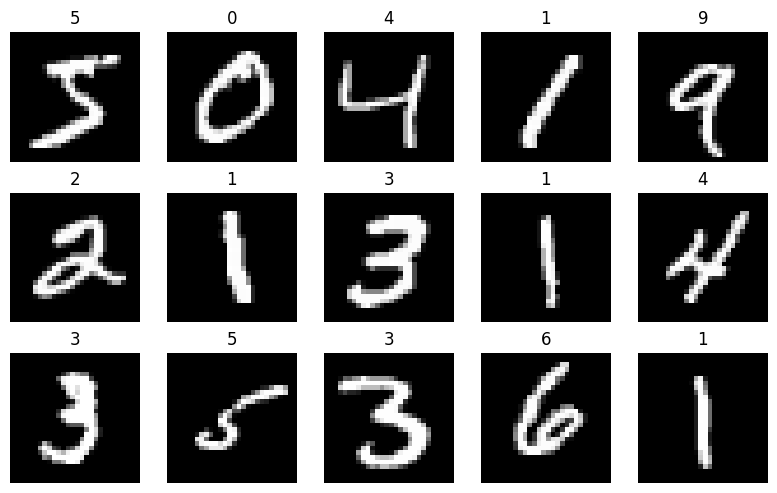

In [32]:
## 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

mnist 데이터셋은 사람의 필기체로 쓰인 0 ~ 9까지의 숫자들로 이루어진 데이터셋이다. 0 ~ 9까지 총 10개의 정답 레이블로 구성되어 있다.

## 3-2 데이터 전처리

In [33]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절한다. 0 ~ 255 범위의 값으로 이루어진 데이터의 범위를 0 ~ 1 사이의 값을 가지도록 정규화하기 위해 데이터의 최대값인 255로 나눈다.

In [34]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


검증 셋에도 동일한 방식으로 정규화 방법을 적용한다.

In [35]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

정규화 변환이 완료된 후 데이터를 출력해보면 0 ~ 1 사이의 값이 출력되는 것을 확인할 수 있다.

In [36]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

> 정규화는 데이터의 전체 범위를 0 ~ 1 사이의 값을 가지도록 한다. 정규화하는 이유는 입력 데이터가 정규호되어 모델이 학습하는 경우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴하기 때문이다. 또한 local optimum(국소 최적)에 빠지는 현상을 방지해주는 효과도 있다.

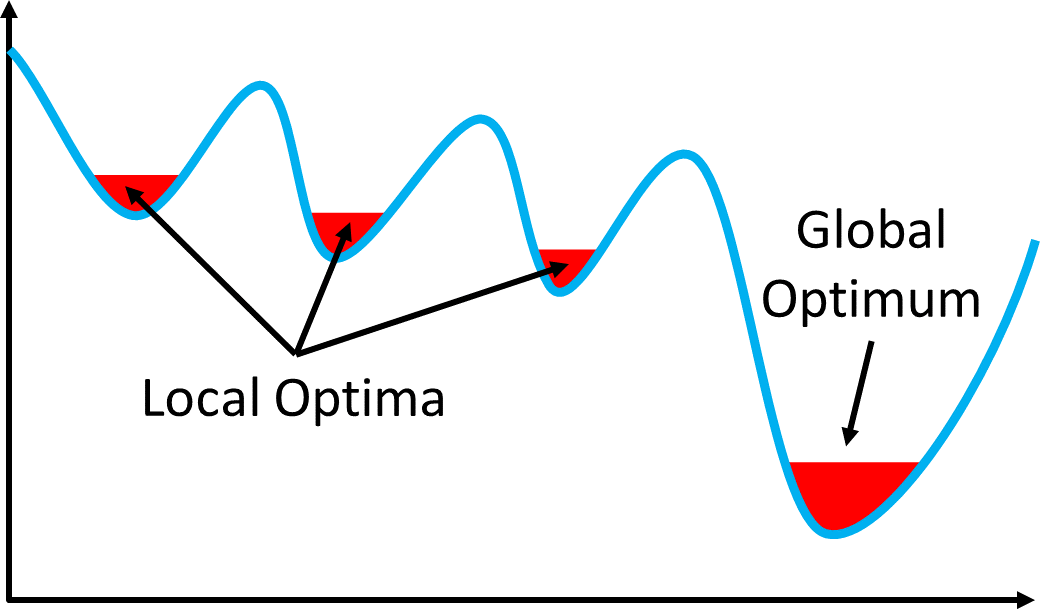

## 3-3 Flatten 레이어

정규화가 끝난 x_train의 shape은 (60000,28,28)이다. 즉, 
정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지된다. 여기서 60000은 데이터셋의 크기를 나타내고 28,28은 이미지의 크기를 나타낸다.

샘플 이미지의 형태는 (28,28)로 이루어져 있고 2차원 입력으로 볼 수 있다. 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없기 떄문에 1차원으로 전처리하여 주입해야 한다.

In [37]:
print(f'변경 전 shape:{x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


또는 Flatten 레이어를 사용하면 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능하다.

In [39]:
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후:(60000, 784)


Flatten 층을 적용한 결과 shape이 (60000,784)로 출력되는 것을 확인할 수 있다. 784는 가로 세로 픽셀 수를 곱한 값이다. (28*28=784)

## 3-4 활성화 함수

활성화 함수(Activation Function)은 입력을 비선형 출력으로 변환해주는 함수이다. 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 한다.

자주 사용되는 활성화 함수로는 시그모이드(Sigmoid), 하이퍼볼릭 탄젠트(Hyperbolic Tangent 혹은 tanh), ReLU(Rectified Unit), Leaky ReLU 등이 있다.

텐서플로 케라스 레이어에 활성화 함수를 적용하고 싶다면 activation 매개변수에 활성화 함수명을 지정해주면 된다.

In [40]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

다음과 같이 별도의 층처럼 적용할 수도 있다. 별도의 층으로 적용하는 경우는 Dense 레이어 다음에 배치 정규화(Batch Normalization)를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용된다. 즉, 레이어 구성을 조금 더 커스터마이징하고 싶을 때 구분하여 처리한다.

In [42]:
## 다른 방법
# Dense 레이어와 relu 활성호 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

## 3-5 입력과 출력

딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적이다.

In [43]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일)
        tf.keras.layers.Dense(10, activation='softmax'),
])

다중 분류 문제(출력층의 노드 개수가 2개 이상)에서는 softmax 활성화 함수를 사용한다.

이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid 활성화 함수를 적용한다.(단, 이진 분류 모델이더라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수를 사용한다.)

In [44]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

## 3-6 손실함수

Dense(1, activation='sigmoid')
- loss = `binary_crossentropy`

Dense(2 이상, activation='softmax')
- loss = `categorical_crossentropy` (원핫 벡터인 레이블)
- loss = `sparse_categorical_crossentropy`

In [45]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [46]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

mnist 손글씨 데이터셋은 클래스의 개수가 10개이므로 마지막 출력층에 해당하는 Dense 레이어의 노드 개수를 10으로 지정한다. 출력 데이터가 0 ~ 9까지 레이블 값을 갖기 때문에 손실함수로는 `sparse_categorical_crosstropy`를 지정한다.

## 3-7 옵티마이저

옵티마이즈(optimizer)는 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법이다.

케라스에서 지원하는 옵티마이저 목록:
SGD, **Adam**, Adagrad, Nadam, RMSprop, Adadelta, Adamax, Ftrl

In [47]:
# 방법1: 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 방법2: 문자열로 지정
model.compile(optimizer='adam')

## 3-8 평가지표

**accuracy**, auc, precision, recall 등

In [48]:
# 방법1: 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [49]:
# 방법2: 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 3-9 훈련

모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력한다.

In [50]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2318 - accuracy: 0.9322 - val_loss: 0.1469 - val_accuracy: 0.9522
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0968 - accuracy: 0.9697 - val_loss: 0.1074 - val_accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0687 - accuracy: 0.9786 - val_loss: 0.0867 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0513 - accuracy: 0.9836 - val_loss: 0.0701 - val_accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.0851 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0833 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.0875 - val_accura

## 3-10 평가

In [51]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0991 - accuracy: 0.9780
검증 셋 정확도: 0.9779999852180481


`evaluate()` 메소드는 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환한다.

## 3-11 예측

훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업을 수행할 수 있다.

In [52]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [53]:
# 예측 결과 출력
predictions[0]

array([7.7804577e-14, 1.9259325e-12, 1.9738258e-11, 3.2547194e-13,
       1.5506339e-14, 4.3774862e-15, 4.8696517e-16, 9.9999994e-01,
       1.5838782e-16, 8.9947876e-12], dtype=float32)

10개의 확률값들이 출력되었다. 이는 모델의 마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 값이 출력된 것이다. softmax 활성화 함수를 거친 10개의 출력 값은 순차적으로 0 ~ 9까지의 10개의 개별 클레스에 대한 분류 확률값을 나타낸다. 이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스이다. 넘파이 배열의 argmax를 사용하여 가장 높은 확률값을 가지는 클래스 결과를 확인할 수 있다.

In [55]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


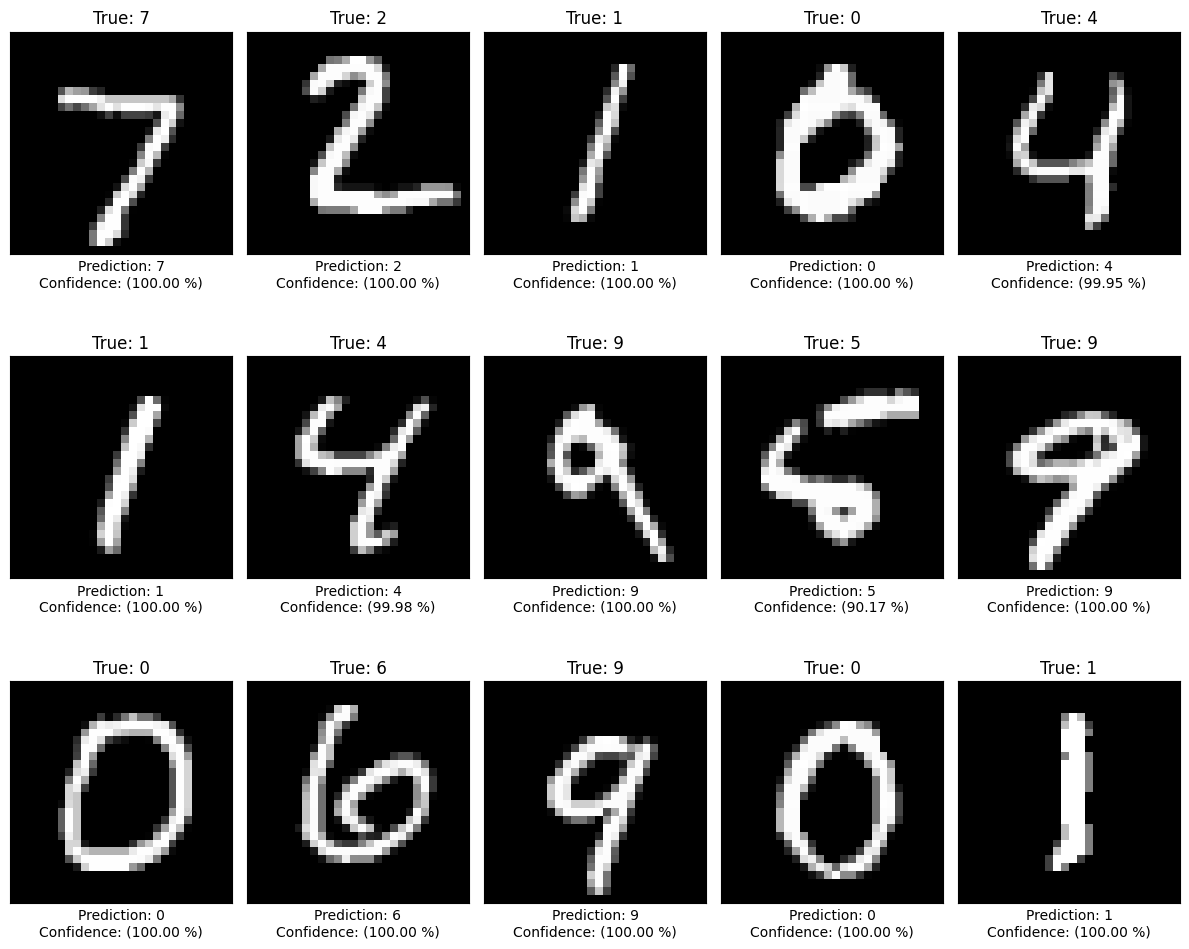

In [61]:
## 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()